# Experiment 02: 基于代理模型的数据驱动优化


目标：使用从简单采样数据中学习得到的代理模型来近似目标函数。    
函数：f(x)=x^2+3sin(x)   
范围：[-10,10]


In [819]:
import numpy as np
import matplotlib.pyplot as plt

In [820]:
def objective(x):
    return x**2 + 3*np.sin(x)

In [821]:
np.random.seed(0)

N=20 ##初始随机采样少量数据
x=np.random.uniform(-10,10,N)##均匀随机采样
y=objective(x)

In [822]:
degree=10##回归多项式的阶数
coeffs=np.polyfit(x,y,degree)##多项式回归拟合

def surrogate(x):
    return np.polyval(coeffs,x)

In [823]:
x_dense=np.linspace(-10,10,1000)##用于绘图的自变量
y_surrogate=surrogate(x_dense)##预测值

best_index=np.argmin(y_surrogate)
x_hat=x_dense[best_index]

In [824]:
true_x_hat=objective(x_hat)

print("Surrogate optimal x:", x_hat)
print("True objective value at surrogate optimum:", true_x_hat)

Surrogate optimal x: -0.9909909909909906
True objective value at surrogate optimum: -1.527644799889961


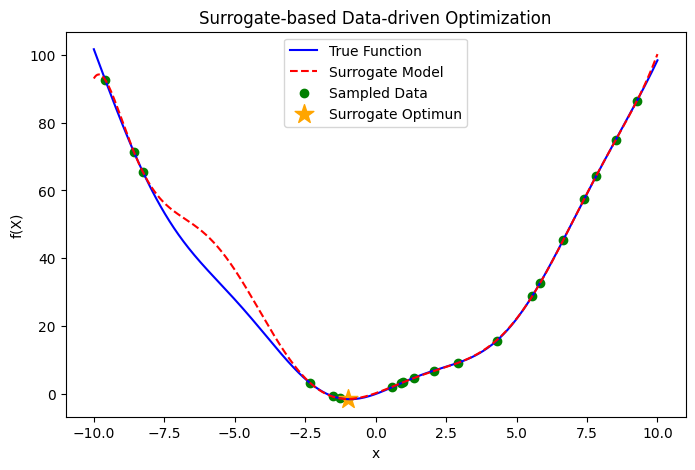

In [825]:
plt.figure(figsize=(8,5))

plt.plot(x_dense,objective(x_dense),label="True Function",color='blue')

plt.plot(x_dense,y_surrogate,label="Surrogate Model",color='red',linestyle='--')

plt.scatter(x,y,color='green',label='Sampled Data')##scatter函数用于绘制散点图

plt.scatter(x_hat,true_x_hat,color='orange',label='Surrogate Optimun',s=200,marker='*')

plt.legend()
plt.xlabel("x")
plt.ylabel("f(X)")
plt.title("Surrogate-based Data-driven Optimization")
plt.show()

## 讨论

-代理模型能近似目标函数的全局趋势

-代理函数的阶数增大，其与目标函数拟合程度越好